In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import  train_test_split 
import math
from tensorflow.keras.utils import to_categorical
import os
import cv2

In [2]:
cat_path = "datasett-hundogkatt/training_set/training_set/cats/"
dog_path = "datasett-hundogkatt/training_set/training_set/dogs/"

In [3]:
cat_img = []
for i in os.listdir(cat_path):
    if i.endswith(".jpg"):
        temp_img = cv2.imread(os.path.join(cat_path, i), cv2.IMREAD_GRAYSCALE)
        temp_img = cv2.resize(temp_img, (64,64), interpolation= cv2.INTER_LINEAR )
        cat_img.append(temp_img)

In [4]:
cat_img = np.asarray(cat_img)
cat_img = np.expand_dims(cat_img,-1)

In [5]:
y_cat = np.zeros(cat_img.shape[0])

In [6]:
dog_img = []
for i in os.listdir(dog_path):
    if i.endswith(".jpg"):
        temp_img = cv2.imread(os.path.join(dog_path, i), cv2.IMREAD_GRAYSCALE)
        temp_img = cv2.resize(temp_img, (64,64), interpolation= cv2.INTER_LINEAR )
        dog_img.append(temp_img)

In [7]:
dog_img = np.asarray(dog_img)
dog_img = np.expand_dims(dog_img,-1)

In [8]:
y_dog = np.ones(dog_img.shape[0])

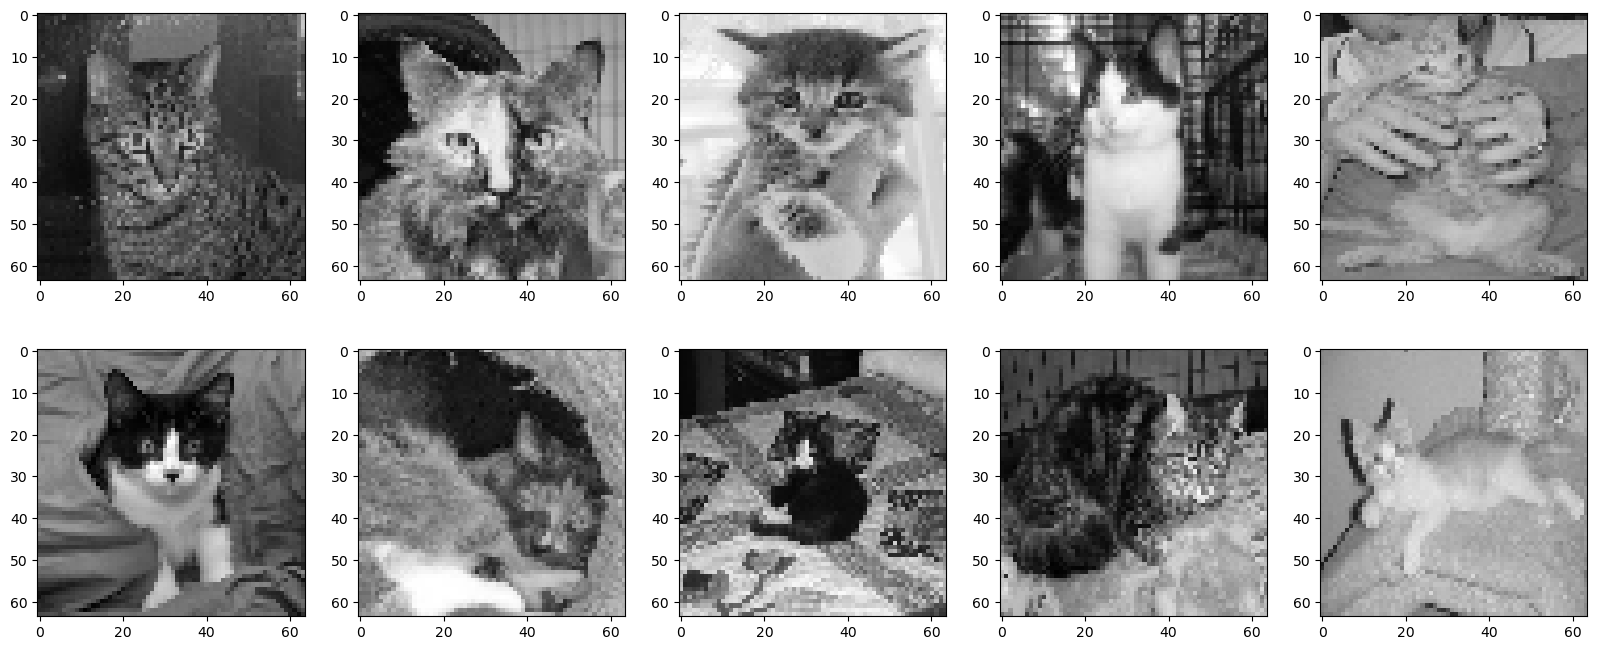

In [9]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(cat_img[i],cmap='gray', vmin=0, vmax=255)

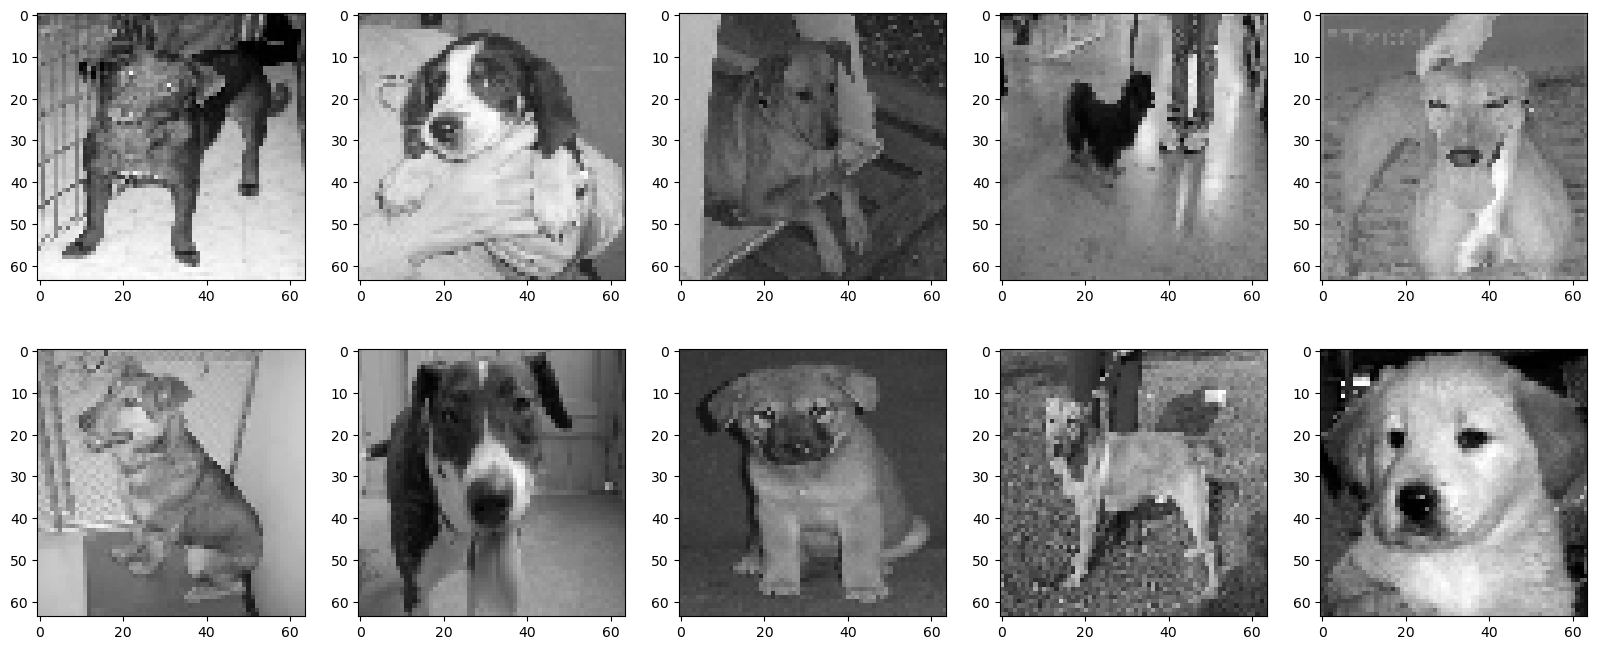

In [10]:
plt.figure(figsize=(20,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(dog_img[i],cmap='gray', vmin=0, vmax=255)

In [11]:
X = np.vstack([cat_img,dog_img])

In [12]:
y = np.hstack([y_cat,y_dog])

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

In [14]:
np.unique(y_train, return_counts=True)

(array([0., 1.]), array([3225, 3179], dtype=int64))

In [15]:
np.unique(y_val, return_counts=True)

(array([0., 1.]), array([775, 826], dtype=int64))

In [16]:
y_train = np.expand_dims(y_train ,-1)

In [17]:
X_train.shape

(6404, 64, 64, 1)

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(6, 5, activation='relu', input_shape=(X_train.shape[1],X_train.shape[2],1)))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(16, 5, activation='relu'))
model.add(tf.keras.layers.AveragePooling2D(2))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Conv2D(120, 5, activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(84, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 60, 60, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 30, 30, 6)        0         
 ePooling2D)                                                     
                                                                 
 activation_2 (Activation)   (None, 30, 30, 6)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 13, 13, 16)       0         
 ePooling2D)                                                     
                                                                 
 activation_3 (Activation)   (None, 13, 13, 16)       

In [20]:
model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), 
                metrics = [tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.AUC(curve='ROC')])

In [21]:
history = model.fit(x=X_train,y=y_train, epochs=25, batch_size=64, validation_data=(X_val,y_val), shuffle=True)

Epoch 1/25
101/101 [==============================] - 27s 230ms/step - loss: 1.0231 - binary_accuracy: 0.5212 - auc: 0.5236 - val_loss: 0.8359 - val_binary_accuracy: 0.5422 - val_auc: 0.5668
Epoch 2/25
101/101 [==============================] - 13s 129ms/step - loss: 0.8043 - binary_accuracy: 0.5573 - auc: 0.5803 - val_loss: 0.7955 - val_binary_accuracy: 0.5565 - val_auc: 0.5944
Epoch 3/25
101/101 [==============================] - 15s 153ms/step - loss: 0.7420 - binary_accuracy: 0.5839 - auc: 0.6157 - val_loss: 0.7412 - val_binary_accuracy: 0.5759 - val_auc: 0.6140
Epoch 4/25
101/101 [==============================] - 19s 191ms/step - loss: 0.7002 - binary_accuracy: 0.6051 - auc: 0.6486 - val_loss: 0.7277 - val_binary_accuracy: 0.5840 - val_auc: 0.6260
Epoch 5/25
101/101 [==============================] - 18s 183ms/step - loss: 0.6692 - binary_accuracy: 0.6220 - auc: 0.6755 - val_loss: 0.7181 - val_binary_accuracy: 0.5903 - val_auc: 0.6319
Epoch 6/25
101/101 [=========================

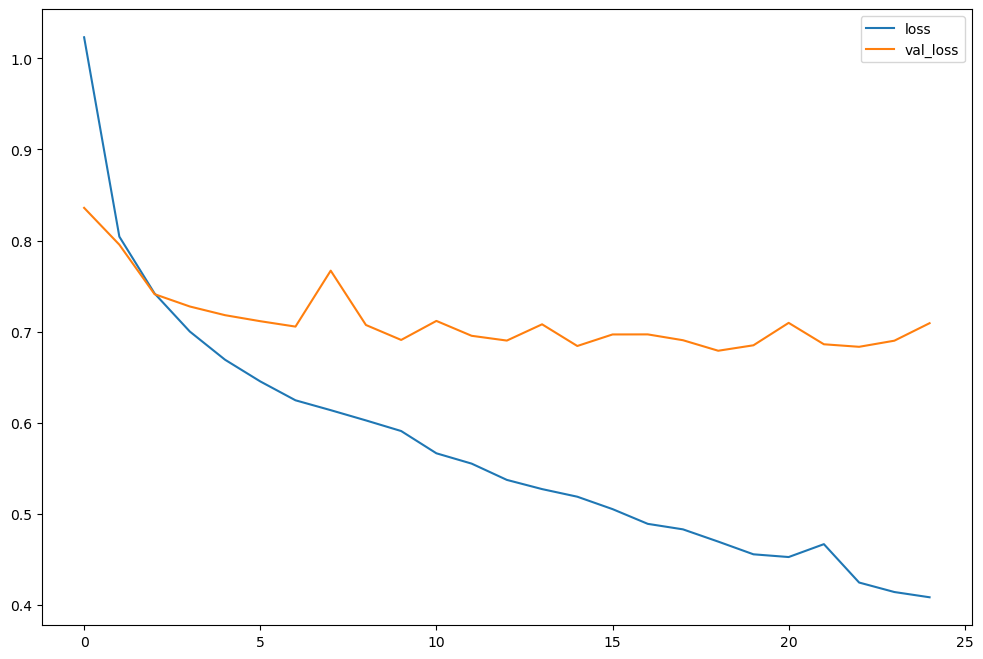

In [22]:
plt.figure(figsize=(12,8))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

In [23]:
history.history.keys()

dict_keys(['loss', 'binary_accuracy', 'auc', 'val_loss', 'val_binary_accuracy', 'val_auc'])

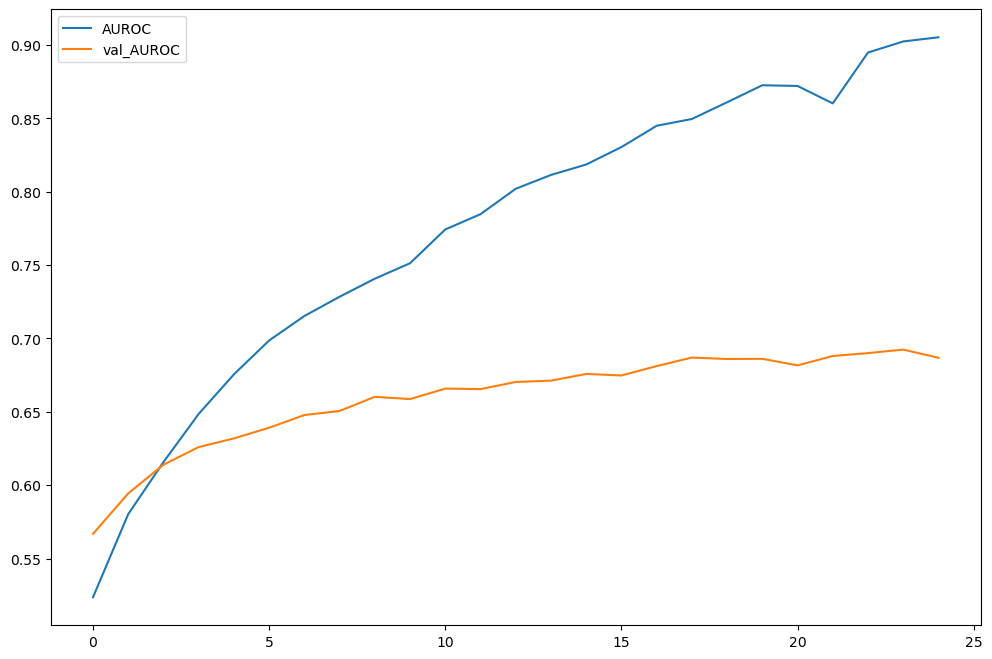

In [24]:
plt.figure(figsize=(12,8))
plt.plot(history.history[list(history.history.keys())[2]], label="AUROC")
plt.plot(history.history[list(history.history.keys())[5]], label="val_AUROC")
plt.legend()